<a href="https://colab.research.google.com/github/camilasini/IC-UFPA/blob/main/altera%C3%A7%C3%B5es_nas_configs_das_IMFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emd

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import emd
from scipy import ndimage

path = r'/content/drive/MyDrive/Colab Notebooks/cleaned_50hz/0000101_50hz.set'

matdat1 = loadmat(path)
data = matdat1['data'][8]

sample_rate = 200

In [ ]:
def mask_sift_second_layer(IA, masks, config={}):
    imf2 = np.zeros((IA.shape[0], IA.shape[1], config['max_imfs']))
    for ii in range(IA.shape[1]):
        config['mask_freqs'] = masks[ii:]
        tmp = emd.sift.mask_sift(IA[:, ii], **config)
        imf2[:, ii, :tmp.shape[1]] = tmp
    return imf2

def plot_holo(imf):
  IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht')

  masks = np.array([25/2**ii for ii in range(12)])/sample_rate
  config = emd.sift.get_config('mask_sift')
  config['mask_amp_mode'] = 'ratio_imf'
  config['max_imfs'] = 5
  config['imf_opts/sd_thresh'] = 0.05
  config['envelope_opts/interp_method'] = 'pchip'

  imf2 = emd.sift.mask_sift_second_layer(IA, masks, sift_args=config)

  IP2, IF2, IA2 = emd.spectra.frequency_transform(imf2, sample_rate, 'nht')
  
  carrier_hist = (1, 100, 128,'log')
  am_hist = (1e-2, 100, 128, 'log')

  fcarrier, spec = emd.spectra.hilberthuang(IF, IA, carrier_hist, sum_imfs=False)

  fcarrier, hht = emd.spectra.hilberthuang(IF, IA, carrier_hist, sum_time=False)
  shht = ndimage.gaussian_filter(hht, 2)

  fcarrier, fam, holo = emd.spectra.holospectrum(IF, IF2, IA2, carrier_hist, am_hist)
  sholo = ndimage.gaussian_filter(holo, 1)

  fig,ax=plt.subplots(1,1, figsize=(12,6))
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))
  plt.yscale('log')
  plt.xscale('log')
  plt.ylim(0.5,32)
  plt.xlim(1,32)
  plt.yticks(2**np.arange(6),2**np.arange(6))
  plt.xticks(2**np.arange(6),2**np.arange(6))
  plt.colorbar(cp)
  ax.set_title('holospectrum')
  ax.set_xlabel('FM Frequency (Hz)')
  ax.set_ylabel('AM Frequency (Hz)')
  plt.show()
  
  return

<ipython-input-5-36742d8db9e6>:35: UserWarning: The following kwargs were not used by contour: 'shade'
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))


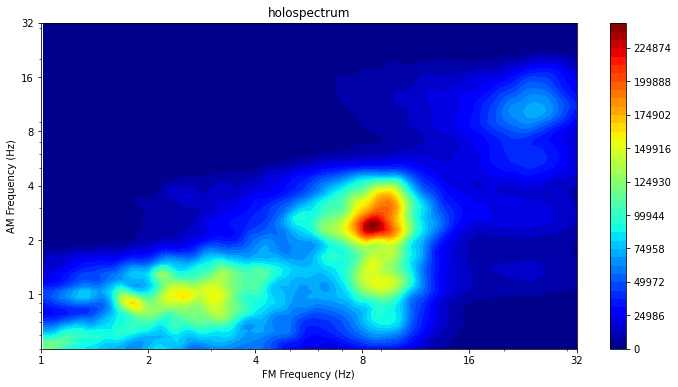

In [ ]:
config = emd.sift.get_config('mask_sift')
config['max_imfs'] = 7
config['mask_freqs'] = 'if'
config['mask_amp_mode'] = 'ratio_imf'
config['imf_opts/sd_thresh'] = 0.5
config['mask_step_factor'] = 5

imf = emd.sift.mask_sift(data, **config)
plot_holo(imf)

<ipython-input-5-36742d8db9e6>:35: UserWarning: The following kwargs were not used by contour: 'shade'
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))


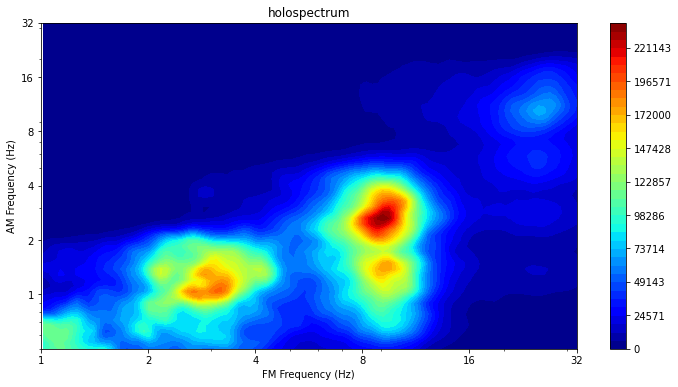

In [ ]:
config = emd.sift.get_config('mask_sift')
config['max_imfs'] = 7
config['mask_freqs'] = 'if'
config['mask_amp_mode'] = 'ratio_imf'
config['imf_opts/sd_thresh'] = 0.05
config['mask_step_factor'] = 3

imf = emd.sift.mask_sift(data, **config)
plot_holo(imf)

<ipython-input-5-36742d8db9e6>:35: UserWarning: The following kwargs were not used by contour: 'shade'
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))


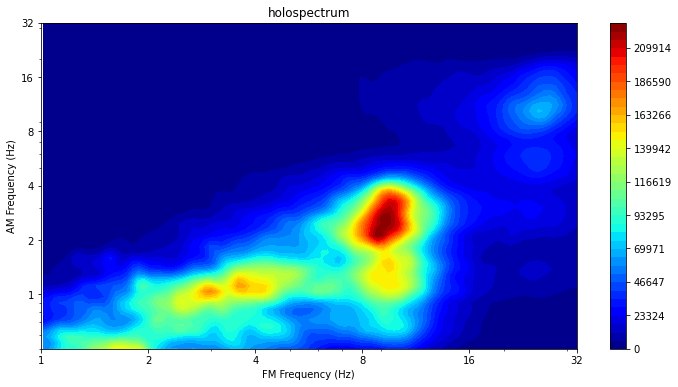

In [ ]:
config = emd.sift.get_config('mask_sift')
config['max_imfs'] = 7
config['mask_freqs'] = 'if'
config['mask_amp_mode'] = 'ratio_imf'
config['imf_opts/sd_thresh'] = 0.05
config['mask_step_factor'] = 9

imf = emd.sift.mask_sift(data, **config)
plot_holo(imf)

<ipython-input-5-36742d8db9e6>:35: UserWarning: The following kwargs were not used by contour: 'shade'
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))


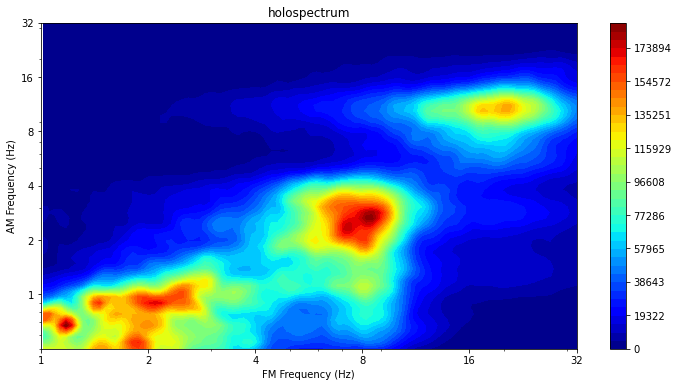

In [ ]:
config = emd.sift.get_config('mask_sift')
config['max_imfs'] = 7
config['mask_freqs'] = 'if'
config['mask_amp_mode'] = 'ratio_imf'
config['imf_opts/sd_thresh'] = 1
config['mask_step_factor'] = 9

imf = emd.sift.mask_sift(data, **config)
plot_holo(imf)

<ipython-input-5-36742d8db9e6>:35: UserWarning: The following kwargs were not used by contour: 'shade'
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))


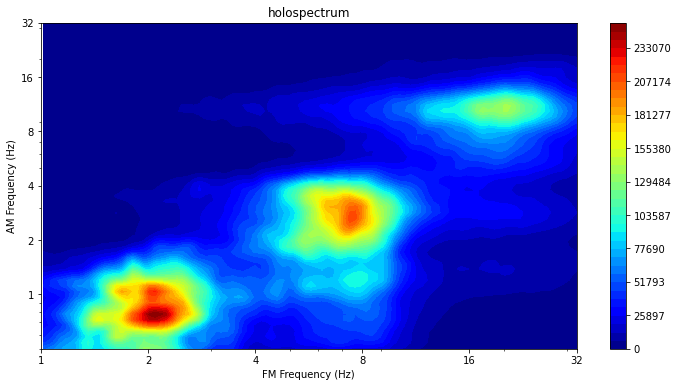

In [ ]:
config = emd.sift.get_config('mask_sift')
config['max_imfs'] = 7
config['mask_freqs'] = 'if'
config['mask_amp_mode'] = 'ratio_imf'
config['imf_opts/sd_thresh'] = 1
config['mask_step_factor'] = 3

imf = emd.sift.mask_sift(data, **config)
plot_holo(imf)